In [1]:
var openDigger = require('../src/open_digger');

In [2]:
var query = openDigger.driver.clickhouse.query;query(    `SHOW DATABASES`).then(res=>{    console.log(res);})

[
  { name: '_temporary_and_external_tables' },
  { name: 'default' },
  { name: 'github_log' },
  { name: 'system' }
]


[
  23, 48, 67, 10, 67, 39,  9,  2, 32,  2,
  18,  1, 21,  6, 13, 24, 18,  4, 19, 10,
   7, 12, 11, 12, 42,  5,  8, 20,  5, 26,
  45,  0, 31, 48, 17, 24,  7, 10, 39
]
[
  [ '201503', 23 ], [ '201506', 48 ], [ '201509', 67 ],
  [ '201510', 10 ], [ '201603', 67 ], [ '201607', 39 ],
  [ '201608', 9 ],  [ '201610', 2 ],  [ '201704', 32 ],
  [ '201705', 2 ],  [ '201707', 18 ], [ '201708', 1 ],
  [ '201711', 21 ], [ '201712', 6 ],  [ '201802', 13 ],
  [ '201805', 24 ], [ '201806', 18 ], [ '201807', 4 ],
  [ '201809', 19 ], [ '201810', 10 ], [ '201811', 7 ],
  [ '201812', 12 ], [ '201902', 11 ], [ '201903', 12 ],
  [ '201907', 42 ], [ '201908', 5 ],  [ '201909', 8 ],
  [ '201912', 20 ], [ '202001', 5 ],  [ '202003', 26 ],
  [ '202007', 45 ], [ '202008', 0 ],  [ '202011', 31 ],
  [ '202103', 48 ], [ '202105', 17 ], [ '202107', 24 ],
  [ '202108', 7 ],  [ '202109', 10 ], [ '202112', 39 ]
]


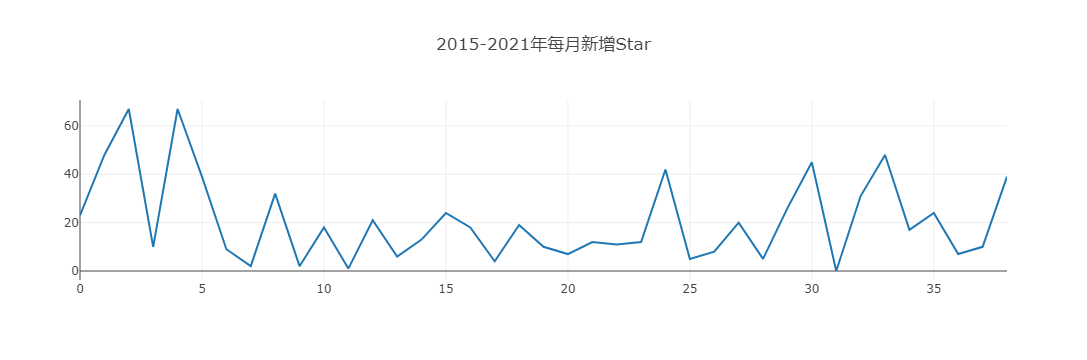

┌─────────┬──────────┬────┐
│ (index) │    0     │ 1  │
├─────────┼──────────┼────┤
│    0    │ '201503' │ 23 │
│    1    │ '201506' │ 48 │
│    2    │ '201509' │ 67 │
│    3    │ '201510' │ 10 │
│    4    │ '201603' │ 67 │
│    5    │ '201607' │ 39 │
│    6    │ '201608' │ 9  │
│    7    │ '201610' │ 2  │
│    8    │ '201704' │ 32 │
│    9    │ '201705' │ 2  │
│   10    │ '201707' │ 18 │
│   11    │ '201708' │ 1  │
│   12    │ '201711' │ 21 │
│   13    │ '201712' │ 6  │
│   14    │ '201802' │ 13 │
│   15    │ '201805' │ 24 │
│   16    │ '201806' │ 18 │
│   17    │ '201807' │ 4  │
│   18    │ '201809' │ 19 │
│   19    │ '201810' │ 10 │
│   20    │ '201811' │ 7  │
│   21    │ '201812' │ 12 │
│   22    │ '201902' │ 11 │
│   23    │ '201903' │ 12 │
│   24    │ '201907' │ 42 │
│   25    │ '201908' │ 5  │
│   26    │ '201909' │ 8  │
│   27    │ '201912' │ 20 │
│   28    │ '202001' │ 5  │
│   29    │ '202003' │ 26 │
│   30    │ '202007' │ 45 │
│   31    │ '202008' │ 0  │
│   32    │ '202011'

In [3]:
var data=[];
var data1=[];
var res=openDigger.driver.clickhouse.query(`Select toYear(created_at)*100+toMonth(created_at)as month,max(repo_stargazers_count)as count
from github_log.events 
where repo_id=2209077
and type='PullRequestEvent'
group by month
order by month
`).then(res=>{
        for(var m=1;m<=39;m++)
                (data.push(res[m].count-res[m-1].count),
                 data1.push([res[m].month,res[m].count-res[m-1].count])
                );
                 console.log(data);
                 console.log(data1);
        openDigger.render.plotly([{
                   y: data 
        }], {title: `2015-2021年每月新增Star` })
        console.table(data1);


})

[
  -1,  9, 7, 2, 10, 13, 11, -1,  6, -1,
   8,  0, 5, 0,  7,  9,  7,  1,  3,  3,
   1,  3, 6, 0,  7,  6,  2,  4, -1,  6,
   1, -1, 6, 7,  7,  4,  5,  3, -1
]
[
  [ '201503', -1 ], [ '201506', 9 ],  [ '201509', 7 ],
  [ '201510', 2 ],  [ '201603', 10 ], [ '201607', 13 ],
  [ '201608', 11 ], [ '201610', -1 ], [ '201704', 6 ],
  [ '201705', -1 ], [ '201707', 8 ],  [ '201708', 0 ],
  [ '201711', 5 ],  [ '201712', 0 ],  [ '201802', 7 ],
  [ '201805', 9 ],  [ '201806', 7 ],  [ '201807', 1 ],
  [ '201809', 3 ],  [ '201810', 3 ],  [ '201811', 1 ],
  [ '201812', 3 ],  [ '201902', 6 ],  [ '201903', 0 ],
  [ '201907', 7 ],  [ '201908', 6 ],  [ '201909', 2 ],
  [ '201912', 4 ],  [ '202001', -1 ], [ '202003', 6 ],
  [ '202007', 1 ],  [ '202008', -1 ], [ '202011', 6 ],
  [ '202103', 7 ],  [ '202105', 7 ],  [ '202107', 4 ],
  [ '202108', 5 ],  [ '202109', 3 ],  [ '202112', -1 ]
]


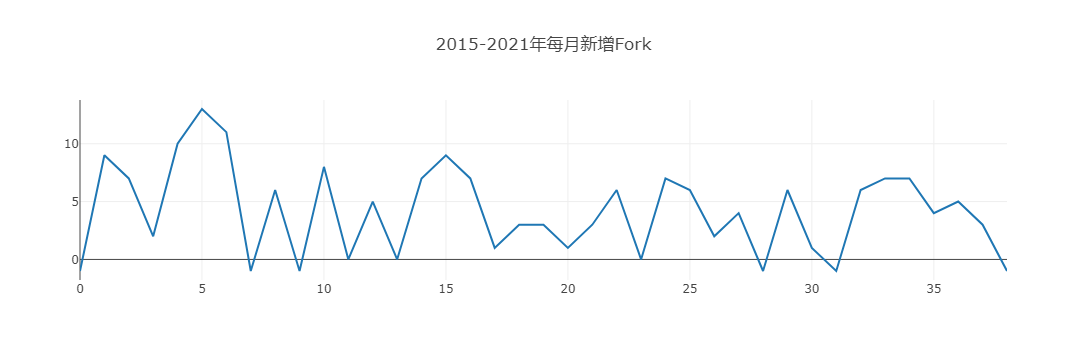

┌─────────┬──────────┬────┐
│ (index) │    0     │ 1  │
├─────────┼──────────┼────┤
│    0    │ '201503' │ -1 │
│    1    │ '201506' │ 9  │
│    2    │ '201509' │ 7  │
│    3    │ '201510' │ 2  │
│    4    │ '201603' │ 10 │
│    5    │ '201607' │ 13 │
│    6    │ '201608' │ 11 │
│    7    │ '201610' │ -1 │
│    8    │ '201704' │ 6  │
│    9    │ '201705' │ -1 │
│   10    │ '201707' │ 8  │
│   11    │ '201708' │ 0  │
│   12    │ '201711' │ 5  │
│   13    │ '201712' │ 0  │
│   14    │ '201802' │ 7  │
│   15    │ '201805' │ 9  │
│   16    │ '201806' │ 7  │
│   17    │ '201807' │ 1  │
│   18    │ '201809' │ 3  │
│   19    │ '201810' │ 3  │
│   20    │ '201811' │ 1  │
│   21    │ '201812' │ 3  │
│   22    │ '201902' │ 6  │
│   23    │ '201903' │ 0  │
│   24    │ '201907' │ 7  │
│   25    │ '201908' │ 6  │
│   26    │ '201909' │ 2  │
│   27    │ '201912' │ 4  │
│   28    │ '202001' │ -1 │
│   29    │ '202003' │ 6  │
│   30    │ '202007' │ 1  │
│   31    │ '202008' │ -1 │
│   32    │ '202011'

In [4]:
var data=[];
var data1=[];
var res=openDigger.driver.clickhouse.query(`Select toYear(created_at)*100+toMonth(created_at)as month,max(repo_forks_count)as count
from github_log.events 
where repo_id=2209077
and type='PullRequestEvent'
group by month
order by month
`).then(res=>{
        for(var m=1;m<=39;m++)
                (data.push(res[m].count-res[m-1].count),
                 data1.push([res[m].month,res[m].count-res[m-1].count])
                );
                 console.log(data);
                 console.log(data1);
        openDigger.render.plotly([{
                   y: data 
        }], {title: `2015-2021年每月新增Fork` })
        console.table(data1);


})

[
  '1', '1', '1', '1', '1', '2',
  '2', '2', '1', '1', '1', '1',
  '2', '1', '4', '2', '3', '1',
  '1', '2', '1', '6', '1', '2',
  '1', '1', '1', '3', '1', '1',
  '2', '1'
]
[
  [ '201501', '1' ], [ '201503', '1' ],
  [ '201506', '1' ], [ '201509', '1' ],
  [ '201510', '1' ], [ '201607', '2' ],
  [ '201608', '2' ], [ '201610', '2' ],
  [ '201704', '1' ], [ '201705', '1' ],
  [ '201707', '1' ], [ '201711', '1' ],
  [ '201802', '2' ], [ '201805', '1' ],
  [ '201806', '4' ], [ '201809', '2' ],
  [ '201810', '3' ], [ '201811', '1' ],
  [ '201812', '1' ], [ '201902', '2' ],
  [ '201907', '1' ], [ '201908', '6' ],
  [ '201909', '1' ], [ '201912', '2' ],
  [ '202003', '1' ], [ '202007', '1' ],
  [ '202011', '1' ], [ '202103', '3' ],
  [ '202105', '1' ], [ '202107', '1' ],
  [ '202108', '2' ], [ '202112', '1' ]
]


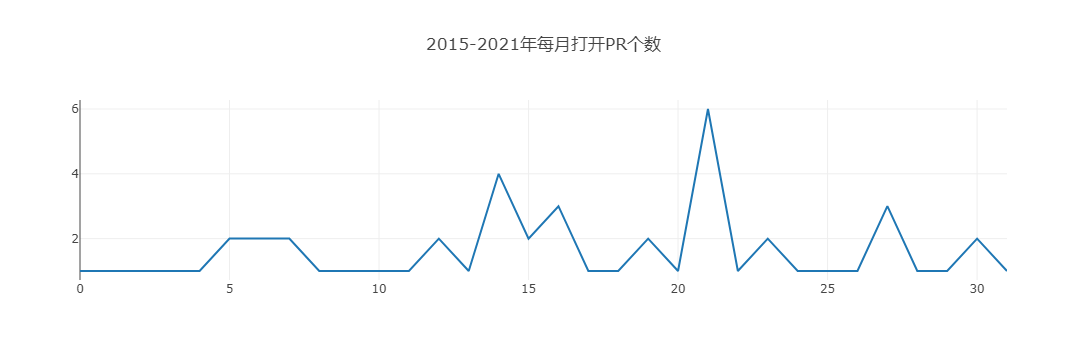

┌─────────┬──────────┬───────┐
│ (index) │  month   │ count │
├─────────┼──────────┼───────┤
│    0    │ '201501' │  '1'  │
│    1    │ '201503' │  '1'  │
│    2    │ '201506' │  '1'  │
│    3    │ '201509' │  '1'  │
│    4    │ '201510' │  '1'  │
│    5    │ '201607' │  '2'  │
│    6    │ '201608' │  '2'  │
│    7    │ '201610' │  '2'  │
│    8    │ '201704' │  '1'  │
│    9    │ '201705' │  '1'  │
│   10    │ '201707' │  '1'  │
│   11    │ '201711' │  '1'  │
│   12    │ '201802' │  '2'  │
│   13    │ '201805' │  '1'  │
│   14    │ '201806' │  '4'  │
│   15    │ '201809' │  '2'  │
│   16    │ '201810' │  '3'  │
│   17    │ '201811' │  '1'  │
│   18    │ '201812' │  '1'  │
│   19    │ '201902' │  '2'  │
│   20    │ '201907' │  '1'  │
│   21    │ '201908' │  '6'  │
│   22    │ '201909' │  '1'  │
│   23    │ '201912' │  '2'  │
│   24    │ '202003' │  '1'  │
│   25    │ '202007' │  '1'  │
│   26    │ '202011' │  '1'  │
│   27    │ '202103' │  '3'  │
│   28    │ '202105' │  '1'  │
│   29  

In [5]:
var data=[];
var data1=[];
var res=openDigger.driver.clickhouse.query(`Select toYear(created_at)*100+toMonth(created_at)as month,count(*)as count
from github_log.events 
where repo_id=2209077
and type='PullRequestEvent'
and action ='opened'
group by month
order by month
`).then(res=>{
        for(var m=0;m<=31;m++)
                (data.push(res[m].count),
                 data1.push([res[m].month,res[m].count])
                );
                 console.log(data);
                 console.log(data1);
        openDigger.render.plotly([{
                   y: data 
        }], {title: `2015-2021年每月打开PR个数` })
        console.table(res);


})

[
  '3', '1', '1', '1',
  '1', '1', '1', '1',
  '1', '2', '1', '1',
  '1', '1'
]
[
  [ '201608', '3' ],
  [ '201705', '1' ],
  [ '201708', '1' ],
  [ '201712', '1' ],
  [ '201802', '1' ],
  [ '201805', '1' ],
  [ '201807', '1' ],
  [ '201809', '1' ],
  [ '201812', '1' ],
  [ '202003', '2' ],
  [ '202008', '1' ],
  [ '202103', '1' ],
  [ '202105', '1' ],
  [ '202108', '1' ]
]


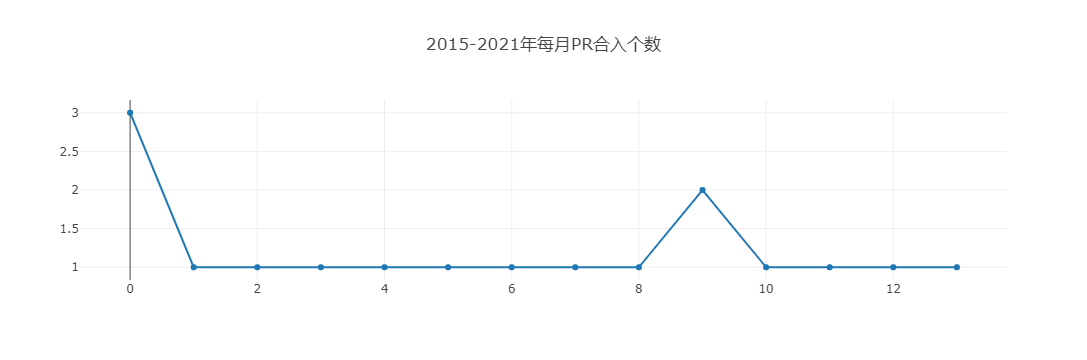

┌─────────┬──────────┬───────┐
│ (index) │  month   │ count │
├─────────┼──────────┼───────┤
│    0    │ '201608' │  '3'  │
│    1    │ '201705' │  '1'  │
│    2    │ '201708' │  '1'  │
│    3    │ '201712' │  '1'  │
│    4    │ '201802' │  '1'  │
│    5    │ '201805' │  '1'  │
│    6    │ '201807' │  '1'  │
│    7    │ '201809' │  '1'  │
│    8    │ '201812' │  '1'  │
│    9    │ '202003' │  '2'  │
│   10    │ '202008' │  '1'  │
│   11    │ '202103' │  '1'  │
│   12    │ '202105' │  '1'  │
│   13    │ '202108' │  '1'  │
│   14    │ '202203' │  '1'  │
└─────────┴──────────┴───────┘


In [14]:
var data=[];
var data1=[];
var res=openDigger.driver.clickhouse.query(`Select toYear(created_at)*100+toMonth(created_at)as month,count(*)as count
from github_log.events 
where repo_id=2209077
and type='PullRequestEvent'
and pull_merged=1
group by month
order by month
`).then(res=>{
        for(var m=0;m<=13;m++)
                (data.push(res[m].count),
                 data1.push([res[m].month,res[m].count])
                );
                 console.log(data);
                 console.log(data1);
        openDigger.render.plotly([{
                   y: data 
        }], {title: `2015-2021年每月PR合入个数` })
        console.table(res);

})

[
  '2', '1', '2', '1', '1', '2', '1', '1', '2', '2',
  '1', '1', '1', '1', '3', '1', '1', '1', '2', '2',
  '1', '2', '1', '1', '1', '1', '1', '2', '3', '1',
  '2', '2', '1', '1', '2', '2', '1', '3', '2', '2',
  '2', '4', '3', '1', '3', '4', '3', '3', '1', '2',
  '4', '1', '1', '1', '2', '2', '2', '1', '1', '3',
  '2', '1', '5', '1', '1', '1', '2', '2', '1', '1',
  '3', '1', '1', '1', '2', '1', '2', '1', '2', '3',
  '2', '1', '1', '2'
]
[
  [ '201501', '2' ], [ '201502', '1' ], [ '201503', '2' ], [ '201504', '1' ],
  [ '201505', '1' ], [ '201506', '2' ], [ '201507', '1' ], [ '201508', '1' ],
  [ '201509', '2' ], [ '201510', '2' ], [ '201511', '1' ], [ '201512', '1' ],
  [ '201601', '1' ], [ '201602', '1' ], [ '201603', '3' ], [ '201604', '1' ],
  [ '201605', '1' ], [ '201606', '1' ], [ '201607', '2' ], [ '201608', '2' ],
  [ '201609', '1' ], [ '201610', '2' ], [ '201611', '1' ], [ '201612', '1' ],
  [ '201701', '1' ], [ '201702', '1' ], [ '201703', '1' ], [ '201704', '2' ],
  [ '201705

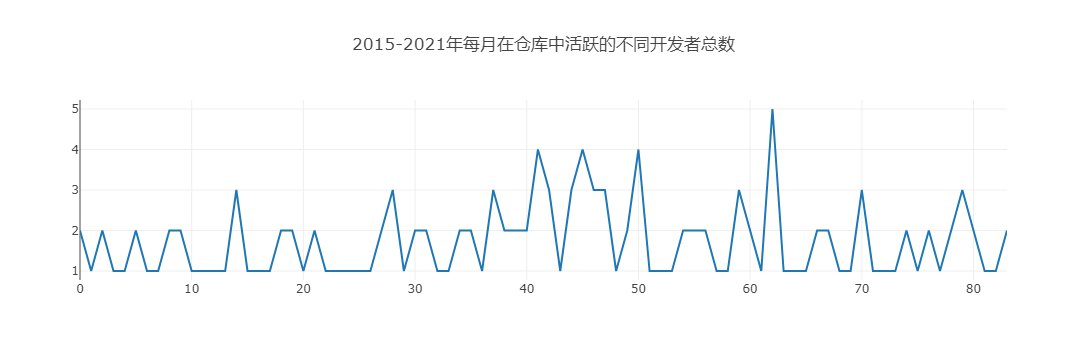

┌─────────┬──────────┬───────┐
│ (index) │  month   │ count │
├─────────┼──────────┼───────┤
│    0    │ '201501' │  '2'  │
│    1    │ '201502' │  '1'  │
│    2    │ '201503' │  '2'  │
│    3    │ '201504' │  '1'  │
│    4    │ '201505' │  '1'  │
│    5    │ '201506' │  '2'  │
│    6    │ '201507' │  '1'  │
│    7    │ '201508' │  '1'  │
│    8    │ '201509' │  '2'  │
│    9    │ '201510' │  '2'  │
│   10    │ '201511' │  '1'  │
│   11    │ '201512' │  '1'  │
│   12    │ '201601' │  '1'  │
│   13    │ '201602' │  '1'  │
│   14    │ '201603' │  '3'  │
│   15    │ '201604' │  '1'  │
│   16    │ '201605' │  '1'  │
│   17    │ '201606' │  '1'  │
│   18    │ '201607' │  '2'  │
│   19    │ '201608' │  '2'  │
│   20    │ '201609' │  '1'  │
│   21    │ '201610' │  '2'  │
│   22    │ '201611' │  '1'  │
│   23    │ '201612' │  '1'  │
│   24    │ '201701' │  '1'  │
│   25    │ '201702' │  '1'  │
│   26    │ '201703' │  '1'  │
│   27    │ '201704' │  '2'  │
│   28    │ '201705' │  '3'  │
│   29  

In [15]:
var data=[];
var data1=[];
var res=openDigger.driver.clickhouse.query(`Select toYear(created_at)*100+toMonth(created_at)as month,count(distinct issue_author_id)as count
from github_log.events 
where repo_id=2209077
group by month
order by month
`).then(res=>{
        for(var m=0;m<=83;m++)
                (data.push(res[m].count),
                 data1.push([res[m].month,res[m].count])
                );
                 console.log(data);
                 console.log(data1);
        openDigger.render.plotly([{
                   y: data 
        }], {title: `2015-2021年每月在仓库中活跃的不同开发者总数` })
        console.table(res);


})

In [24]:
var mean=0;
query(`Select id,(pull_merged_at-issue_created_at)/86400 as ans,issue_closed_at,issue_created_at
from github_log.events
where repo_id=2209077
and type='PullRequestEvent'
and pull_merged=1
`).then(res=>{
   for(var m=0;m<=17;m++)
      mean=mean+res[m].ans;
       mean=mean/18     
    console.log(mean);})
//PR 从打开到合入的平均时长

38.53397312242797


In [25]:
var mean=0;
var data=[];
query(`Select id,(pull_merged_at-issue_created_at)/86400 as ans,issue_closed_at,issue_created_at
from github_log.events
where repo_id=2209077
and type='PullRequestEvent'
and pull_merged=1
`).then(res=>{
   for(var m=0;m<=17;m++)
    {data.push(res[m].ans)}
     data.sort();
    console.log((data[8]+data[9])/2) 
    ;})
//PR 从打开到合入的中位数

9.013680555555556
